In [139]:
import pandas as pd
import numpy as np

In [158]:
referrals = pd.read_csv('../../Welcome-Centre-DataCorps-Data/referrals.csv', index_col=0)
clients = pd.read_csv('../../Welcome-Centre-DataCorps-Data/clients.csv', index_col=0)

/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (44,46,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
referrals['ReferralTakenDate'] = pd.to_datetime(pd.to_datetime(referrals['ReferralTakenDate']).dt.date)


In [160]:
referrals = referrals.reset_index().groupby(['ClientId', 'ReferralTakenDate']).first().reset_index()\
    .set_index('ReferralInstanceId')

In [161]:
referrals = referrals.sort_values('ReferralTakenDate')

In [162]:
referral_count = referrals.groupby('ClientId').size() 

In [208]:
(referral_count > 10).mean()

0.059895833333333336

In [163]:
referral_no = referrals.assign(count=1).groupby('ClientId').expanding()['count'].sum()

In [164]:
referral_no = referral_no.reset_index().set_index('ReferralInstanceId').drop('ClientId', axis=1)

In [165]:
referrals['referral_no'] = referral_no

In [166]:
referrals = referrals[referrals['referral_no'] < 10]

In [167]:
y = referral_count.loc[referrals['ClientId']] >= 10

In [168]:
referrals.shape

(15037, 156)

In [169]:
referrals[referrals['ClientId'] == 303]

,ClientId,ReferralTakenDate,StatusId,ReferralOnHold,ReferralReadyDate,ReferralCollectedDate,ReferralWorkerID,ReferralPreparedWorkerId,ReferralHandedWorkerId,PartnerName,...,ReferralReason_No Income,ReferralReason_Physical Health,ReferralReason_Relationship Breakdown,ReferralReason_Release from Custody,ReferralReason_Substance Misuse,ReferralReason_Transport costs(hospital/family issues),ReferralReason_Unknown,ReferralReason_no income entitlement,ReferralReason_working - on low income,referral_no
ReferralInstanceId,,,,,,,,,,,,,,,,,,,,,
500,303,2013-01-06,3,0,01/06/13 00:00:00,01/06/13 00:00:00,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
501,303,2013-02-14,3,0,02/14/13 00:00:00,02/14/13 00:00:00,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
502,303,2014-01-20,3,0,01/20/14 00:00:00,01/20/14 00:00:00,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2258,303,2014-05-16,3,0,05/16/14 10:26:00,05/16/14 10:26:00,6,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2657,303,2014-06-10,3,0,06/10/14 15:15:00,06/10/14 15:15:00,7,7.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2936,303,2014-06-27,3,0,06/27/14 14:39:00,06/27/14 14:39:00,5,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3316,303,2014-07-25,3,0,07/25/14 15:29:00,07/25/14 15:29:00,7,7.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4166,303,2014-09-19,3,0,09/19/14 15:40:00,09/19/14 15:40:00,1,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4308,303,2014-09-30,3,0,09/30/14 15:32:00,09/30/14 15:32:00,5,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [170]:
len(y)

15037

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline

In [172]:
pipe = Pipeline([
    ('imp', Imputer()),
    ('scale', StandardScaler()),
    ('cls', LogisticRegression())
])

In [173]:
param_grid = {
    'cls__C': np.logspace(-5,5,11)
}
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc', verbose=3)
gs.fit(referrals[['referral_no']], y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.622122, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.764224, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.810340, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.820961, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.818544, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.842404, total=   0.0s
[CV] cls__C=1e-05 ....................................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] cls__C=0.0001 ...................................................
[CV] .................... cls__C=0.0001, score=0.842404, total=   0.0s
[CV] cls__C=0.0001 ...................................................
[CV] .................... cls__C=0.0001, score=0.802757, total=   0.0s
[CV] cls__C=0.0001 ...................................................
[CV] .................... cls__C=0.0001, score=0.843830, total=   0.0s
[CV] cls__C=0.0001 ...................................................
[CV] .................... cls__C=0.0001, score=0.834443, total=   0.0s
[CV] cls__C=0.0001 ...................................................
[CV] .................... cls__C=0.0001, score=0.858157, total=   0.0s
[CV] cls__C=0.001 ....................................................
[CV] ..................... cls__C=0.001, score=0.622122, total=   0.0s
[CV] cls__C=0.001 ....................................................
[CV] ..................... cls__C=0.001, score=0.764224, total=   0.0s
[CV] 

[CV] .................... cls__C=1000.0, score=0.802757, total=   0.0s
[CV] cls__C=1000.0 ...................................................
[CV] .................... cls__C=1000.0, score=0.843830, total=   0.0s
[CV] cls__C=1000.0 ...................................................
[CV] .................... cls__C=1000.0, score=0.834443, total=   0.0s
[CV] cls__C=1000.0 ...................................................
[CV] .................... cls__C=1000.0, score=0.858157, total=   0.0s
[CV] cls__C=10000.0 ..................................................
[CV] ................... cls__C=10000.0, score=0.622122, total=   0.0s
[CV] cls__C=10000.0 ..................................................
[CV] ................... cls__C=10000.0, score=0.764224, total=   0.0s
[CV] cls__C=10000.0 ..................................................
[CV] ................... cls__C=10000.0, score=0.810340, total=   0.0s
[CV] cls__C=10000.0 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('cls', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'cls__C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=3)

In [174]:
gs.best_score_

0.80175768051883423

In [206]:
y.value_counts()

False    11581
True      3456
dtype: int64

In [175]:
y.index = referrals.index

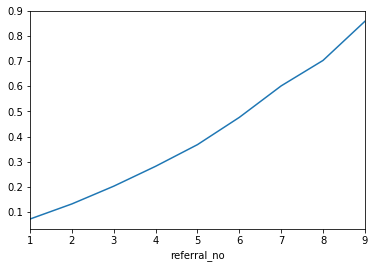

In [176]:
y.groupby(referrals['referral_no']).mean().plot()

In [177]:
%matplotlib inline

## Add Time

In [178]:
referrals['time_since'] = referrals.groupby('ClientId')['ReferralTakenDate'].diff().dt.days

In [179]:
referrals[referrals['ClientId']==357]

,ClientId,ReferralTakenDate,StatusId,ReferralOnHold,ReferralReadyDate,ReferralCollectedDate,ReferralWorkerID,ReferralPreparedWorkerId,ReferralHandedWorkerId,PartnerName,...,ReferralReason_Physical Health,ReferralReason_Relationship Breakdown,ReferralReason_Release from Custody,ReferralReason_Substance Misuse,ReferralReason_Transport costs(hospital/family issues),ReferralReason_Unknown,ReferralReason_no income entitlement,ReferralReason_working - on low income,referral_no,time_since
ReferralInstanceId,,,,,,,,,,,,,,,,,,,,,
579,357,2014-01-07,3,0,01/07/14 00:00:00,01/07/14 00:00:00,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4197,357,2014-09-22,3,0,09/22/14 00:00:00,09/22/14 00:00:00,1,5.0,5.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,258.0
13221,357,2016-06-20,3,0,06/20/16 14:53:00,06/20/16 14:53:00,21,1.0,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,637.0
14249,357,2016-09-01,3,0,09/01/16 13:29:00,09/01/16 13:29:00,8,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,73.0
14315,357,2016-09-06,3,0,09/06/16 15:10:00,09/06/16 15:10:00,18,18.0,18.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
14571,357,2016-09-22,3,0,09/22/16 14:45:00,09/22/16 14:45:00,1,26.0,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,16.0
17373,357,2017-03-06,3,0,03/06/17 14:24:00,03/06/17 14:24:00,35,26.0,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,165.0


In [181]:
referrals['time_since'] = (1 / referrals['time_since']).fillna(0)
referrals['first'] = referrals['referral_no'] == 1

In [182]:
referrals['time_since'].min()


0.0

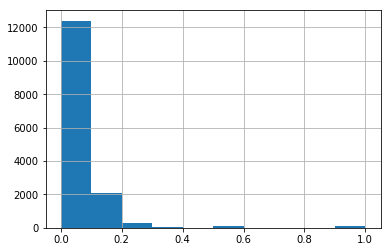

In [183]:
referrals['time_since'].hist()

In [212]:
param_grid = {
    'cls__C': np.logspace(-5,5,11)
}
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc', verbose=0)
gs.fit(referrals[['time_since', 'first']], y)
print(gs.best_score_)

0.694266832062


In [214]:
pd.Series(gs.best_estimator_.steps[-1][1].coef_.ravel(), index=['time_since', 'first'])

time_since    0.007478
first        -0.017034
dtype: float64

# Features

- Time since last 
- EWM stuff 
- Categorical things - reason, age, dependents
- Packs taken
- Agency
- Referral Issue

In [186]:
list(referrals.columns)

['ClientId',
 'ReferralTakenDate',
 'StatusId',
 'ReferralOnHold',
 'ReferralReadyDate',
 'ReferralCollectedDate',
 'ReferralWorkerID',
 'ReferralPreparedWorkerId',
 'ReferralHandedWorkerId',
 'PartnerName',
 'PartnerId',
 'LivingWithPartner',
 'DependantDetails',
 'DependantNumber',
 'EthnicityId',
 'AddressLocalityId',
 'AddressTypeId',
 'ReferralAgencyId',
 'ReferralAgencyWorkerName',
 'ReferralAgencyTelephoneNumber',
 'DietaryExtraNotes',
 'ReferralNotes',
 'UpdateTimeStamp',
 'ReferralStatusId',
 'ReferralStatusDescription',
 'OrderNo',
 'Enabled',
 'EthnicityID',
 'EthnicityDescription',
 'OrderNo.1',
 'Enabled.1',
 'LocalityId',
 'LocalityDescription',
 'OrderNo.2',
 'Enabled.2',
 'ClientAddressTypeID',
 'ClientAddressTypeDescription',
 'OrderNo.3',
 'Enabled.3',
 'ReferralAgencyID',
 'ReferralAgencyName',
 'ReferralAgencyShortName',
 'AddressLine1',
 'AddressLine2',
 'AddressLocalityId.1',
 'AddressLine4',
 'AddressPostCode',
 'ReferralContactName',
 'ReferralContactNumber',
 '

In [187]:
clients['ClientDateOfBirth']

ClientId
2                     NaN
3       07/01/80 00:00:00
4       08/01/88 00:00:00
5       05/01/83 00:00:00
7       12/01/63 00:00:00
8       05/01/88 00:00:00
9       03/01/93 00:00:00
10      03/01/68 00:00:00
11      09/01/88 00:00:00
13      06/01/71 00:00:00
14      10/01/95 00:00:00
15      08/01/84 00:00:00
16      02/01/81 00:00:00
17      09/01/66 00:00:00
18      03/01/78 00:00:00
19      04/01/72 00:00:00
20      07/01/73 00:00:00
21      08/01/72 00:00:00
22      01/01/86 00:00:00
23      08/01/70 00:00:00
24      04/01/92 00:00:00
25      06/01/83 00:00:00
26      10/01/82 00:00:00
27      11/01/90 00:00:00
28      04/01/97 00:00:00
29      09/01/87 00:00:00
31      03/01/65 00:00:00
32      12/01/84 00:00:00
33      11/01/73 00:00:00
34      09/01/94 00:00:00
              ...        
5924    06/01/94 00:00:00
5925    12/01/92 00:00:00
5926    09/01/95 00:00:00
5927    07/01/81 00:00:00
5928    02/01/61 00:00:00
5929    02/01/81 00:00:00
5930    09/01/80 00:00:00
593

In [188]:
referral_reasons = referrals.filter(like='ReferralDomestic')
referral_document = referrals.filter(like='ReferralDocument')
referral_benefit = referrals.filter(like='ReferralBenefit')
referral_issue = referrals.filter(like='ReferralIssue')
referral_reason = referrals.filter(like='ReferralReason')

In [189]:
referral_agency = pd.get_dummies(referrals['ReferralAgencyId'])

In [190]:
general = referrals[['DependantNumber', 'LivingWithPartner']]

In [193]:
X = pd.concat([
    referral_reasons,
    referral_document,
    referral_benefit,
    referral_issue,
    referral_reason,
    referral_agency,
    general
], axis=1)

In [215]:
param_grid = {
    'cls__C': np.logspace(-5,5,11)
}
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc', verbose=3)
gs.fit(pd.concat([referrals[['time_since', 'first']],
                  X], axis=1), y)
print(gs.best_score_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.725061, total=   0.7s
[CV] cls__C=1e-05 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ..................... cls__C=1e-05, score=0.757394, total=   0.6s
[CV] cls__C=1e-05 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ..................... cls__C=1e-05, score=0.780121, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.790461, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.739672, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.765442, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.744508, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.690055, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] ..................... cls__C=1e-05, score=0.747424, total=   0.6s
[CV] cls__C=1e-05 ....................................................
[CV] .

[CV] ...................... cls__C=10.0, score=0.724168, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.753583, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.784658, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.787082, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.746069, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.773391, total=   1.1s
[CV] cls__C=10.0 .....................................................
[CV] ...................... cls__C=10.0, score=0.751454, total=   1.0s
[CV] cls__C=10.0 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:  2.1min finished


0.745864736025


In [216]:
gs.best_score_

0.74586473602548808